In [71]:
import pymongo
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
#from collections import Counter
from bson.objectid import ObjectId
import pprint

In [72]:
client = pymongo.MongoClient()

In [73]:
client = pymongo.MongoClient('localhost',27017)

In [74]:
db = client.bandhub

In [75]:
db.collection_names()

[u'songsStream', u'mergedVideos', u'tracksStream', u'posts']

In [57]:
songCol = db.get_collection('songsStream')
vidCol = db.get_collection('mergedVideos')
trackCol = db.get_collection('tracksStream')
postCol = db.get_collection('posts')

In [58]:
[songCol.count(), vidCol.count(), trackCol.count(), postCol.count()]

[425706, 198169, 350000, 494867]

In [8]:
client.database_names()

[u'admin', u'bandhub', u'local']

In [9]:
!pwd

/home/rrs432


In [14]:
pointer = postCol.find({'songAccess':{'$exists': True}}, {'songAccess':1 ,'hasRecordedTracks':1, '_id':0})
count = 0
for docs in pointer:
    if(docs['songAccess'] == 1):
        count = count + 1
pprint.pprint(count)

408353


[Text(0,0.5,u'Number of files'), Text(0.5,0,u'Duration in seconds')]

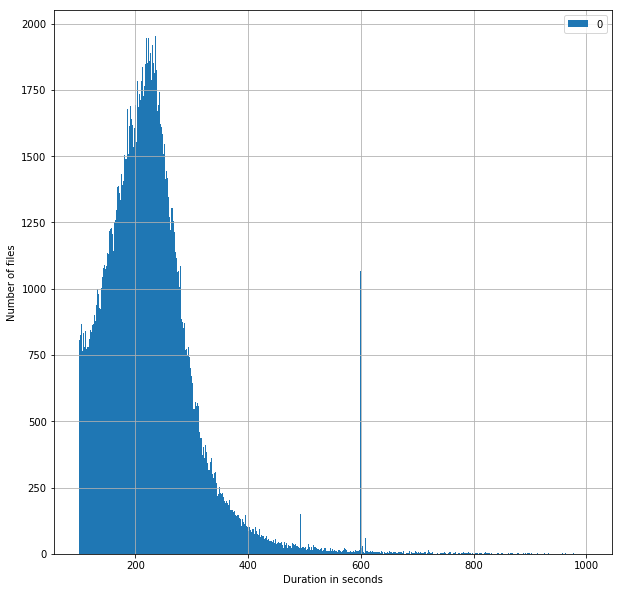

In [50]:
myList = []
pointer = trackCol.find({'durationInSeconds':{'$exists': True}}, {'durationInSeconds':1 , '_id':0})
for docs in pointer:
    myList.append(docs['durationInSeconds']) 
#grab data and put into list
#len(myList)
#plt.hist(myList, normed=True, bins=100)
df = pd.DataFrame(myList)
#df.describe()
#pd.DataFrame.plot(df)
#pd.DataFrame.hist(df)
#convert to dataFrame object for analysis
#x = df.describe()
#ax = df.plot(kind='hist',grid=True,figsize=(10,10),bins = 100)
#ax = df[(df<1000) & (df >= 100)].plot(kind='hist',grid=True,figsize=(10,10))
#ax.set_xlim(0, 1e12)
#ax = df.plot(kind='hist',grid=True,figsize=(10,10),bins = 100)
ax = df[(df<1000) & (df >= 100)].plot(kind='hist',grid=True,figsize=(10,10),bins = 1000)
#df[(df<1000) & (df >= 100)].hist(grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=3, layout=(1,1), bins=100)
ax.set(xlabel="Duration in seconds", ylabel="Number of files")

#df.hist(bins = 1000)
#pprint.pprint(myList)

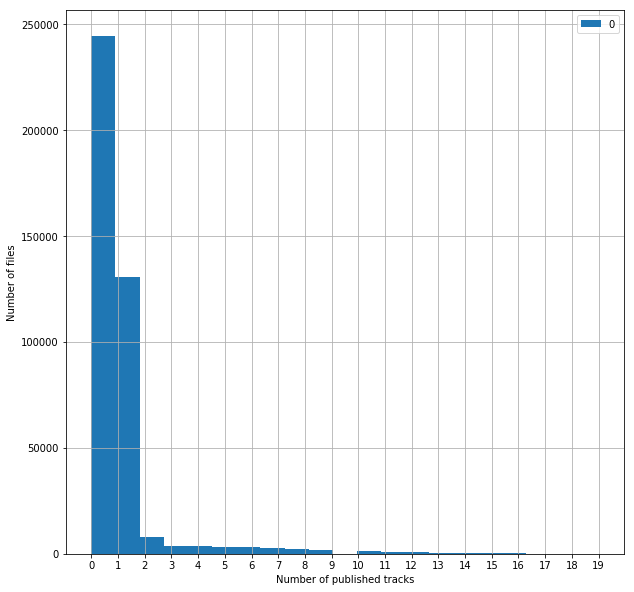

In [107]:
myList = []
pubTracks = postCol.find({'songAccess':{'$exists': True}}, {'participantsInfo':1 ,'songAccess':1, '_id':0})
for docs in pubTracks:
    if(docs['songAccess'] == 1):
        myList.append(len(docs['participantsInfo']['publishedTracks']))
df = pd.DataFrame(myList)
ax = df[(df<20) & (df>=0)].plot(kind='hist',grid=True,figsize=(10,10),bins=21,xticks=range(20)).set(xlabel="Number of published tracks", ylabel="Number of files")


In [83]:
pointer = songCol.find()[13:14]
for docs in pointer:
    pprint.pprint(docs)

{u'_id': ObjectId('520c01f53004aac9f04d4311'),
 u'access': 1,
 u'communityOrder': 290,
 u'dateLastModified': datetime.datetime(2013, 12, 7, 6, 32, 9, 640000),
 u'description': u'',
 u'fbImage': u'http://bandhubmediastream.blob.core.windows.net/files/ct-520c01f53004aac9f04d4311-1.png',
 u'fbImageTracks': [u'520c02433004aac9f04d4312',
                    u'520c029f3004aac9f04d4313',
                    u'520c02e23004aac9f04d4314',
                    u'520c03283004aac9f04d4315'],
 u'groupIds': [ObjectId('564a3fa55a11481a90009708')],
 u'hasRecordedTracks': True,
 u'inCommunity': True,
 u'isFeatured': False,
 u'masterSongId': ObjectId('522a1caa6310675e3200003c'),
 u'migratedToAzure': True,
 u'mp4MergedMobileVideoUrl': u'http://bandhubmediastream.blob.core.windows.net/files/m-f-9c818aea-9bf0-4edb-aff7-f33f69c95506.mp4',
 u'mp4MergedVideoUrl': u'http://bandhubmediastream.blob.core.windows.net/files/f-520c01f53004aac9f04d4311.mp4',
 u'newMusicbrainzMetadataId': ObjectId('5435bf67e4b031b5b2139

In [21]:
pointer = vidCol.find()[1]
for docs in pointer:
    pprint.pprint(docs)

u'mp4MergedVideoUrl'
u'oggMergedVideoUrl'
u'songId'
u'_id'
u'trackIds'


In [99]:
#pointer = songCol.find()[15:16]
genreList = []
genre = songCol.find({'channels':{'$exists': True}}, {'channels':1 , '_id':0})
count = 0
for docs in genre:
    count = count + 1
    if len(docs['channels'])>0:
        genreList.append(docs['channels']) 
pprint.pprint(genreList)

[[u'Pop', u'British'],
 [u'American', u'ClassicRock'],
 [u'60s', u'Beatles', u'ClassicRock', u'British'],
 [u'British', u'Pop', u'90s'],
 [u'American', u'Pop'],
 [u'70s', u'British', u'ClassicRock'],
 [u'RnB', u'American', u'60s'],
 [u'70s', u'British', u'ClassicRock', u'HardRock'],
 [u'ClassicRock', u'American', u'70s'],
 [u'AlternativeRock', u'American', u'90s'],
 [u'American', u'Pop'],
 [u'Latin', u'WorldMusic'],
 [u'Jazz', u'OriginalMusic', u'American'],
 [u'OriginalMusic', u'RnB'],
 [u'OriginalMusic', u'British'],
 [u'Argentinos'],
 [u'HardRock', u'British'],
 [u'Indie', u'American'],
 [u'OriginalMusic'],
 [u'Suomi', u'Metal', u'British'],
 [u'OriginalMusic', u'RnB', u'Canadians'],
 [u'Punk', u'British', u'80s'],
 [u'American', u'Canadians', u'AlternativeRock'],
 [u'AlternativeRock', u'Funk', u'American', u'Canadians'],
 [u'Funk', u'AlternativeRock', u'Canadians', u'American'],
 [u'RnB', u'American'],
 [u'AlternativeRock', u'American'],
 [u'AlternativeRock', u'American'],
 [u'90s'

 [u'Pop', u'American'],
 [u'AlternativeRock', u'British'],
 [u'80s', u'American', u'AlternativeRock'],
 [u'90s', u'AlternativeRock', u'American'],
 [u'OriginalMusic'],
 [u'British', u'Pop'],
 [u'Espa\xf1ol', u'WorldMusic', u'Mexicanos'],
 [u'Espa\xf1ol', u'WorldMusic', u'Mexicanos'],
 [u'American', u'Pop'],
 [u'Espa\xf1ol', u'WorldMusic', u'Mexicanos'],
 [u'OriginalMusic'],
 [u'British', u'Pop'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'American', u'Pop'],
 [u'60s', u'British', u'Beatles', u'ClassicRock'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'American', u'Pop'],
 [u'Metal', u'OriginalMusic'],
 [u'AlternativeRock', u'American'],
 [u'OriginalMusic'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'OriginalMusic'],
 [u'OriginalMusic', u'Metal'],
 [u'60s', u'Beatles', u'British', u'ClassicRock'],
 [u'